# Expectation-Maximization (EM)

### É proposto o uso do algoritmo EM para o agrupamento de dados unidimensionais (1D)

### Bibliotecas a serem utilizadas

In [1]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
import numpy as np  
from scipy.stats import norm
from math import sqrt

### Base de dados a ser analisada é gerada por meio de amostragens de distribuições probabilísticas

In [2]:
np.random.seed(0)

X = np.linspace(-5,5,num=20)
X_1 = X*np.random.rand(len(X)) + 15 # Cluster 1
X_2 = X*np.random.rand(len(X)) - 15 # Cluster 2
X_3 = X*np.random.rand(len(X)) # Cluster 3
X_tot = np.stack((X_1,X_2,X_3)).flatten() # Combina os dados em um vetor

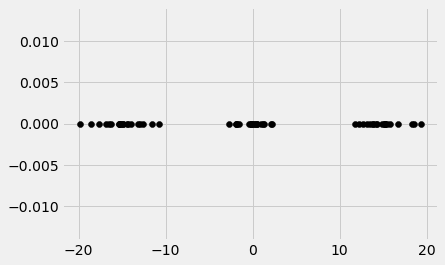

In [3]:
Y = np.zeros(X_tot.shape[0])
plt.scatter(X_tot, Y, c ='k', marker = 'o')
plt.show()

### Algoritmo EM

In [4]:
# Gaussian Mixture 1D

class GM1D:
    def __init__(self,X,iterations):
        self.iterations = iterations
        self.X = X
        self.mu = None # Médias
        self.pi = None # Pi's
        self.var = None # Variâncias

    def run(self):
        # Inicia randomicamente (eu escolhi) os valores de mu, pi e var
        self.mu = [-8, 8, 5]
        self.pi = [1/3, 1/3, 1/3]
        self.var = [25, 9, 1]

        for iter in range(self.iterations):

            ##########
            # E-Step #
            ##########

            r = np.zeros((len(self.X), 3)) # Matriz r para armazenar probabilidades 
            # Cálculo da probabilidade de um dado x_i pertencer a uma gaussiana g
            for c, g, p in zip(range(3), [norm(loc=self.mu[0], scale=sqrt(self.var[0])), 
                                          norm(loc=self.mu[1], scale=sqrt(self.var[1])),
                                          norm(loc=self.mu[2], scale=sqrt(self.var[2]))], self.pi):
                r[:,c] = p*g.pdf(self.X) # Probabilidade dos dados X_tot pertencerem à Gaussiana c 
            # Normalizar as probabilidades de tal forma que cada linha de r some igual a 1 e adicionar pesos (pi) para cada probabilidade
            for i in range(len(r)):
                r[i] = r[i] / (np.sum(r,axis=1)[i])  # Precisa do np.sum(pi) ???????

            # Plot dos dados
            fig = plt.figure(figsize=(10,10))
            ax0 = fig.add_subplot(111)
            for i in range(len(r)):
                ax0.scatter(self.X[i], 0, c=np.array([r[i][0],r[i][1],r[i][2]]), s=100)
            
            # Plot das Gaussianas
            for g, c in zip([norm(loc=self.mu[0], scale=sqrt(self.var[0])).pdf(np.linspace(-20,20,num=60).reshape(60,1)),
                             norm(loc=self.mu[1], scale=sqrt(self.var[1])).pdf(np.linspace(-20,20,num=60).reshape(60,1)),
                             norm(loc=self.mu[2], scale=sqrt(self.var[2])).pdf(np.linspace(-20,20,num=60).reshape(60,1))], 
                             ['r','g','b']):
                ax0.plot(np.linspace(-20,20,num=60),g,c=c)
            

            ##########
            # M-Step #
            ##########

            # Cálculo do m_c
            m_c = [0]*len(r[0])
            for c in range(len(r[0])):
                m = np.sum(r[:,c])
                m_c[c] = m # Cálculo de m_c para cada cluster
            
            # Cálculo do pi_c
            for k in range(len(m_c)):
                self.pi[k] = (m_c[k]/np.sum(m_c)) # Para cada cluster, calcular a fração de pontos que fazem parte do cluster
            
            # Cálculo de mu_c
            self.mu = np.sum(self.X.reshape(len(self.X),1)*r, axis=0)/m_c

            # Cálculo de var_c
            #var_c = [0]*len(r[0])
            for c in range(len(r[0])):
                #var_c[c] = (1/m_c[c])*np.dot(((np.array(r[:,c]).reshape(60,1))*(self.X.reshape(len(self.X),1)-self.mu[c])).T,(self.X.reshape(len(self.X),1)-self.mu[c]))

                for i in range(len(self.X)):
                    self.var[c] += r[i][c]*((self.X[i] - self.mu[c])**2)
                self.var[c] = self.var[c] / m_c[c]

            plt.show()

### Main()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

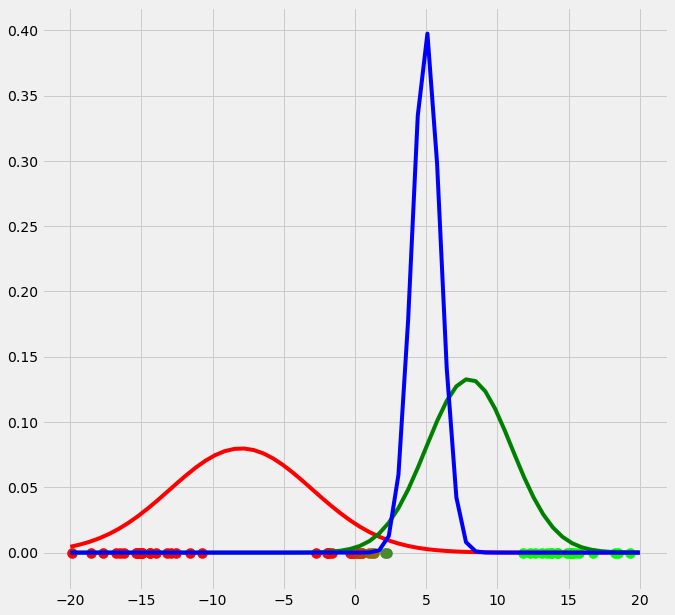

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

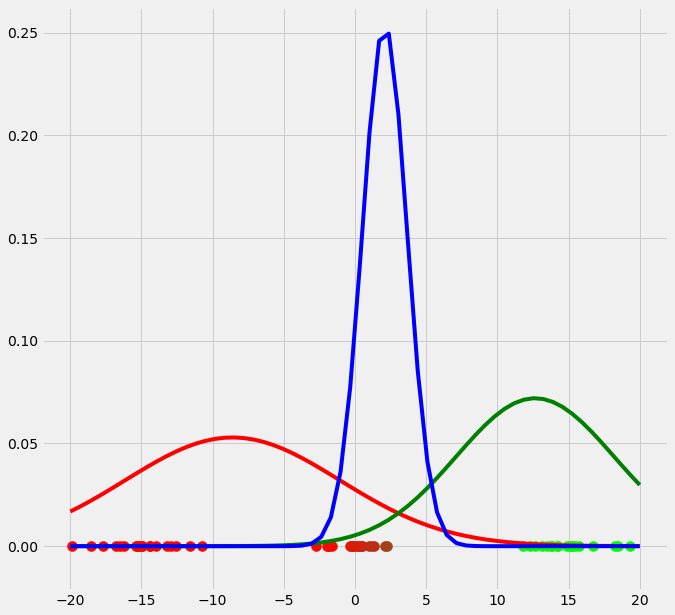

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

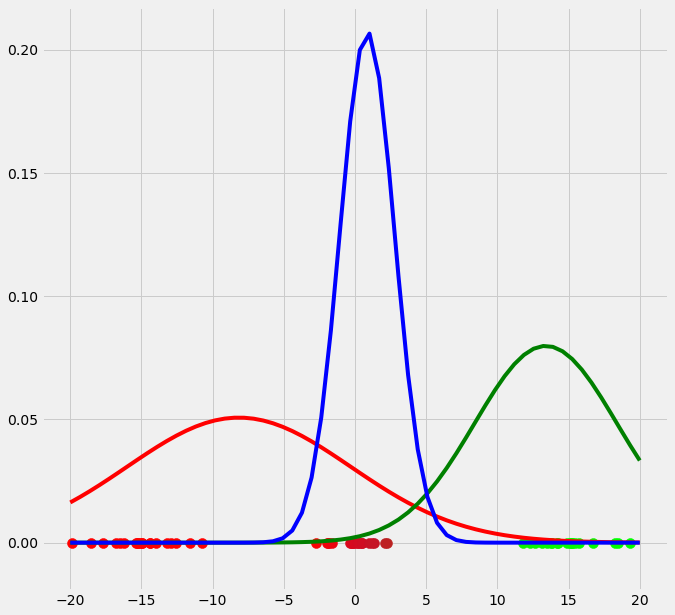

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

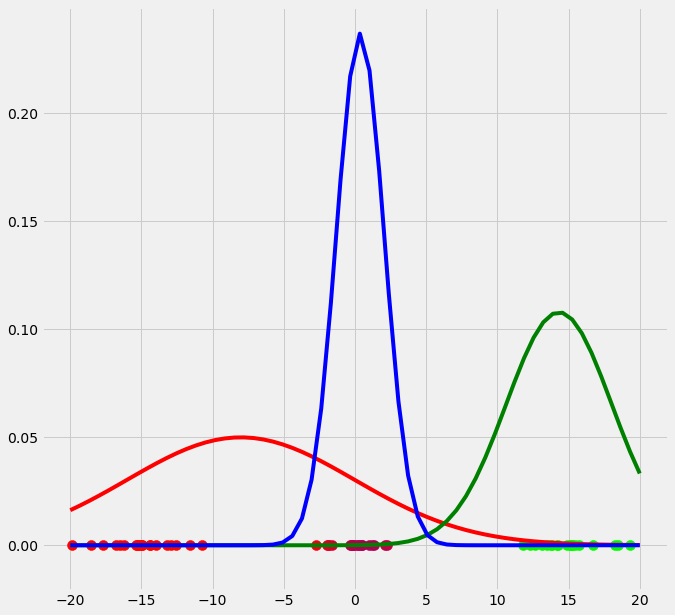

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

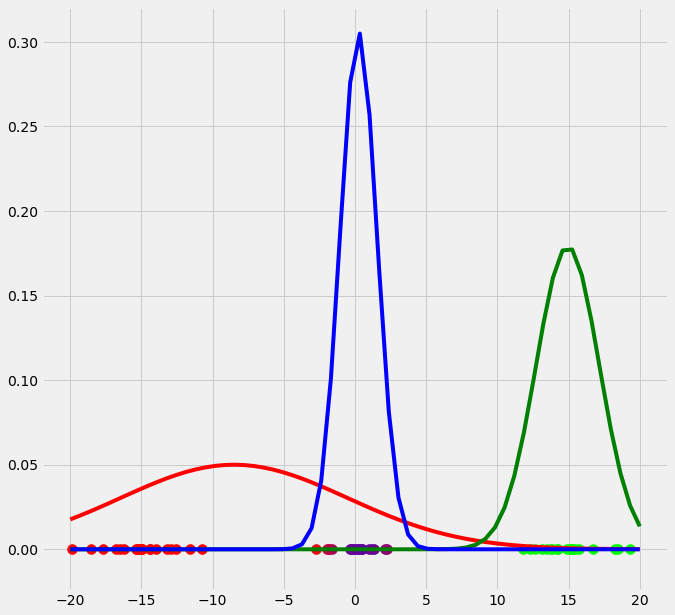

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

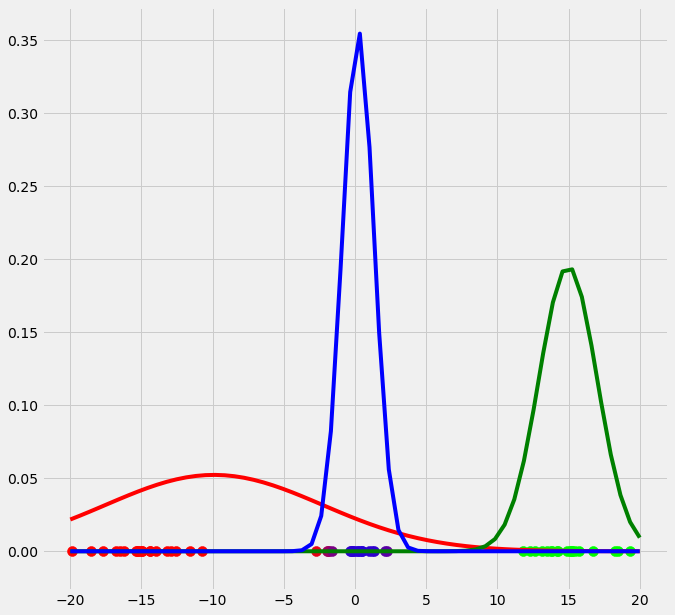

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

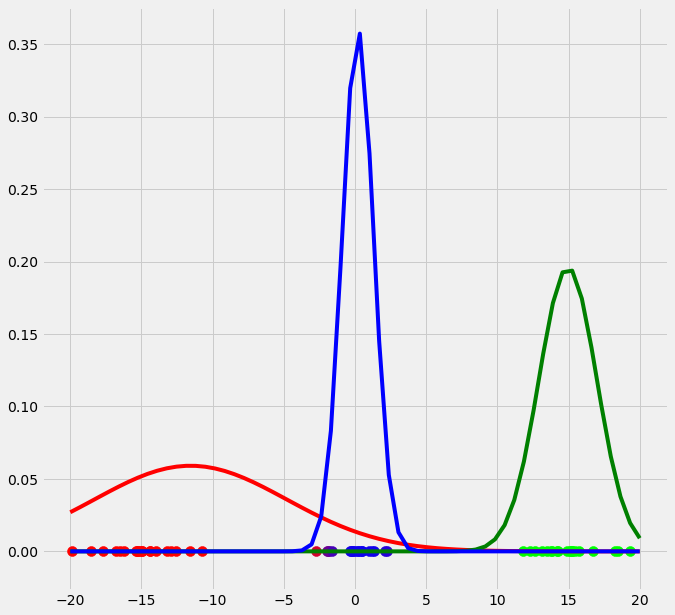

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

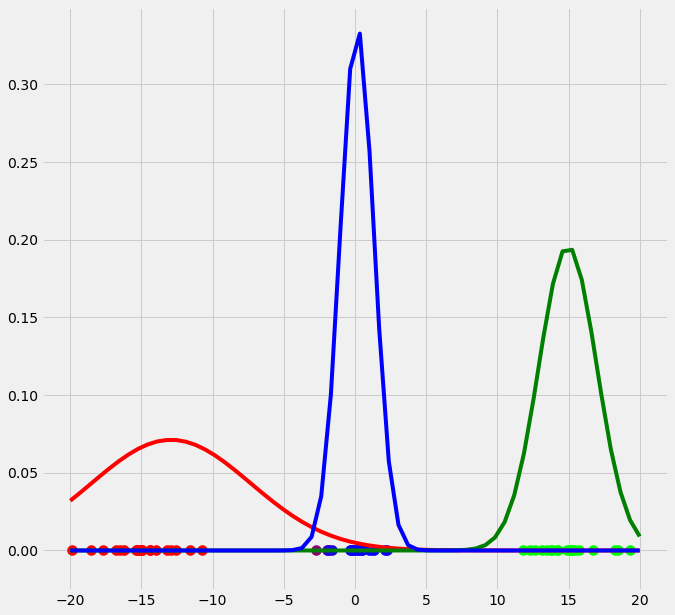

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

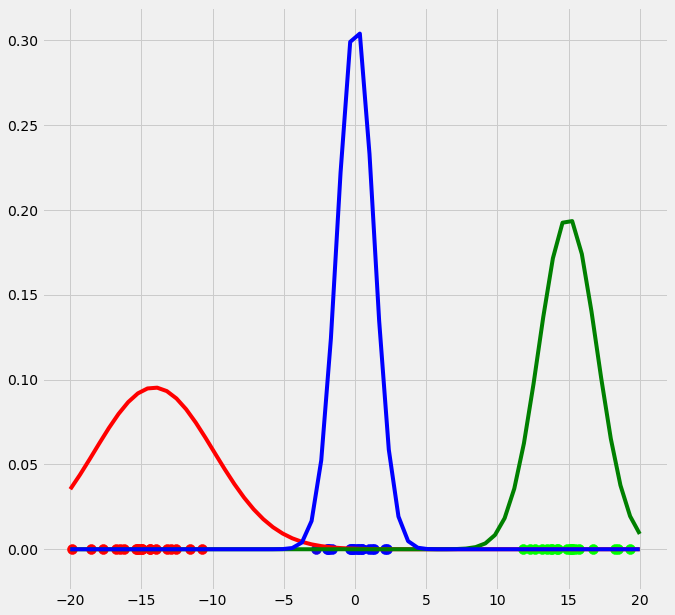

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

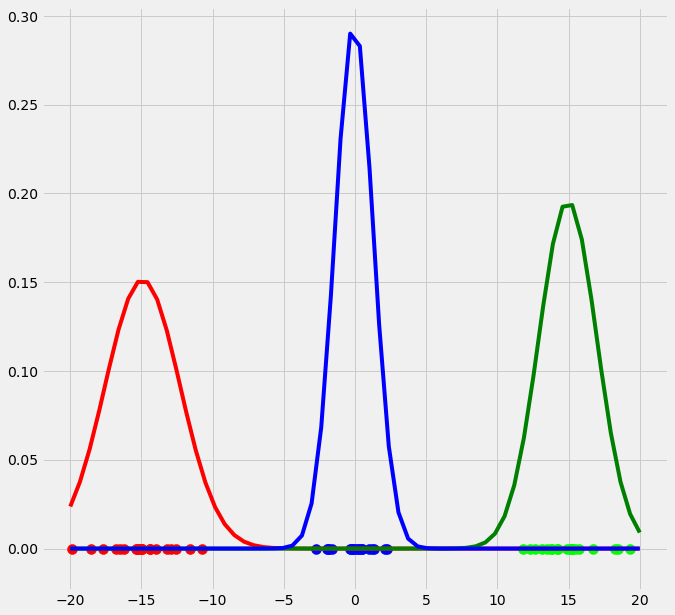

In [5]:
GM1D = GM1D(X_tot, 10)
GM1D.run()